## Maughfirotu Jannah

## CRAWLING DATA 

Data adalah  kumpulan atau catatan fakta yang menggambarkan suatu kejadian, dan masih dalam bentuk data mentah sehingga perlu diolah lebih lanjut untuk menghasilkan informasi. Crawling adalah proses menjelajahi web dan mengunduh halaman web secara otomatis untuk mengumpulkan informasi. Program yang khusus bertugas melakukan crawling disebut Crawler. (Hanifah & Nurhasanah, 2018)

In [ ]:
import scrapy

class Crawling(scrapy.Spider):
    name = "Crawling"
    
    def start_requests(self):
        x = 100000
        for i in range (1,5):
            x +=1
            urls = [
                'https://pta.trunojoyo.ac.id/welcome/detail/040411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/050411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/060411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/070411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/080411'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/090411'+str(x),
            ]
            for url in urls:
                yield scrapy.Request(url=url, callback=self.parse)
    
    def parse(self, response):
        yield{
            'judul' : response.css('#content_journal > ul > li > div:nth-child(2) > a').extract(),
            'abstrak' : response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p').extract()
        }

In [ ]:
scrapy crawl Crawling

### Menggunakan 50 Data PTA, 25 Kategori RPL dan 25 Kategori CAI 

In [2]:
#library numpy berfungsi untuk melakukan operasi vektor dan matriks dengan mengolah array dan array multidimensi. 
#Library NumPy digunakan untuk kebutuhan dalam menganalisis data.
!pip install numpy

In [3]:
#library pandas digunakan untuk mengelola data berbentuk tabel atau disebut dengan dataframe
#Library yang digunakan untuk Penanganan, manipulasi, dan analisis data
!pip install pandas

In [4]:
#NLTK adalah singkatan dari Natural Language Tool Kit
#library yang digunakan untuk membantu kita dalam bekerja dengan teks
#Library ini memudahkan kita untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.
!pip install nltk

In [5]:
#Library sastrawi digunakan untuk melakukan tokenisasi (tokenize) dan membuang stopwords dari teks.
!pip install Sastrawi

In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 

### Menampilkan dokumen  dari hasil Crawling

In [2]:
df = pd.read_csv("abstrakv1.csv")
df.head()

,no,abstrak,kategori,kat_biner
0,1,"Perkembangan game yang semakin pesat, memberik...",rpl,0
1,2,Sistem pengenalan wajah adalah suatu sistem un...,cai,1
2,3,Sidik jari adalah salah satu karakteristik fis...,cai,1
3,4,Teknologi biometrik saat ini mengalami perkemb...,cai,1
4,5,Dalam setiap perusahaan tentunya memiliki data...,rpl,0


## PREPROCESSING 

Preprocessing merupakan proses awal yang akan mentransformasikan data masukan menjadi data dengan format yang sesuai dan siap untuk diproses (Setyohadi et al., 2017).  Tahapan dalam proses text preprocessing antara lain yaitu cleansing, tokenizing, filtering, stopword dan lain-lain. Penerapan tahap text preprocessing dapat berbeda-beda untuk setiap bahasa tergantung dengan kebutuhan, karena perbedaan dalam bahasa tentu memiliki arti yang berbeda untuk tiap katanya.

### Case Folding
Case folding merupakan langkah dalam pengolahan data yang bertujuan untuk mengubah ataumenghilangkan semua huruf kapital pada dokumen menjadi huruf kecil

In [3]:
data_abstrak = df['abstrak']
data_abstrak = data_abstrak.str.lower()
df['abstrak_baru'] = data_abstrak
df['abstrak_baru']

0     perkembangan game yang semakin pesat, memberik...
1     sistem pengenalan wajah adalah suatu sistem un...
2     sidik jari adalah salah satu karakteristik fis...
3     teknologi biometrik saat ini mengalami perkemb...
4     dalam setiap perusahaan tentunya memiliki data...
5     penggunaan teknologi mobile saat ini sangat ma...
6     pengenalan tulisan tangan merupakan topik pene...
7      citra senyum merupakan salah satu fitur biome...
8     kantor badan kepegawaian kota bangkalan adalah...
9     perusahaan pemerintah maupun swasta mempunyai ...
10    penyusunan sistem pendukung keputusan pemiliha...
11    penelitian ini membahas tentang perancangan si...
12    deteksi manusia merupakan  suatu aplikasi yang...
13    dengan prediksi yang baik, dapat dibuat rencan...
14    berawal dari permintaan akan straw (sperma bek...
15    obat merupakan salah satu kebutuhan penting da...
16    seiring dengan perubahan dalam paradigma pemba...
17    kabupaten bangkalan memiliki lahan pertani

### Menghilangkan Angka dan Remove Punctuation 
Remove Punctuation merupakan teknik penghilangan tanda baca yang digunakan dalam sebuah teks untuk membedakan antara kalimat dan bagian penyusunnya dan untukmemperjelas maknanya

In [4]:
import re #library re (regular expression (regex)) dapat digunakan untuk menghapus karakter angka.
import string #library String digunakan untuk memproses string Python standar

def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['abstrak_baru'] = df['abstrak_baru'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['abstrak_baru'] = df['abstrak_baru'].apply(remove_punctuation)

In [5]:
df['abstrak_baru']

0     perkembangan game yang semakin pesat memberika...
1     sistem pengenalan wajah adalah suatu sistem un...
2     sidik jari adalah salah satu karakteristik fis...
3     teknologi biometrik saat ini mengalami perkemb...
4     dalam setiap perusahaan tentunya memiliki data...
5     penggunaan teknologi mobile saat ini sangat ma...
6     pengenalan tulisan tangan merupakan topik pene...
7      citra senyum merupakan salah satu fitur biome...
8     kantor badan kepegawaian kota bangkalan adalah...
9     perusahaan pemerintah maupun swasta mempunyai ...
10    penyusunan sistem pendukung keputusan pemiliha...
11    penelitian ini membahas tentang perancangan si...
12    deteksi manusia merupakan  suatu aplikasi yang...
13    dengan prediksi yang baik dapat dibuat rencana...
14    berawal dari permintaan akan straw sperma beku...
15    obat merupakan salah satu kebutuhan penting da...
16    seiring dengan perubahan dalam paradigma pemba...
17    kabupaten bangkalan memiliki lahan pertani

### Stopword 

Stopword adalah stopwords merupakan kata yang diabaikan dalam pemrosesan dan biasanya disimpan di dalam stop lists. Stop list ini berisi daftar kata umum yang mempunyai fungsi tapi tidak mempunyai arti. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. 

In [6]:
def stopping_word(contents):    
    data_kata = []
    stop_words = stopwords.words('english')
    stop_words2 = stopwords.words('indonesian')
    stop_words.extend(stop_words2)
    jmlData = contents.shape 
    for i in range(jmlData[0]):
        word_tokens = word_tokenize(contents[i])
        # print(word_tokens)
            
        word_tokens_no_stopwords = [w for w in word_tokens if not w in stop_words]

        special_char = "+=`@_!#$%^&*()<>?/\|}{~:;.[],1234567890‘’'" + '"“”●'
        out_list = [''.join(x for x in string if not x in special_char) for string in word_tokens_no_stopwords]
        # print('List after removal of special characters:', out_list)

        while '' in out_list:
            out_list.remove('')
        data_kata.append(out_list)
    return data_kata

In [7]:
stop_kata = stopping_word(df['abstrak_baru'])
df['stop_kata'] = stop_kata

In [8]:
df['stop_kata']

0     [perkembangan, game, pesat, alternative, pemin...
1     [sistem, pengenalan, wajah, sistem, mengenali,...
2     [sidik, jari, salah, karakteristik, fisik, man...
3     [teknologi, biometrik, mengalami, perkembangan...
4     [perusahaan, memiliki, data, berkaitan, kegiat...
5     [penggunaan, teknologi, mobile, marak, disampi...
6     [pengenalan, tulisan, tangan, topik, penelitia...
7     [citra, senyum, salah, fitur, biometrik, dijad...
8     [kantor, badan, kepegawaian, kota, bangkalan, ...
9     [perusahaan, pemerintah, swasta, tujuan, dicap...
10    [penyusunan, sistem, pendukung, keputusan, pem...
11    [penelitian, membahas, perancangan, sistem, in...
12    [deteksi, manusia, aplikasi, berfungsi, mendet...
13    [prediksi, rencana, kerja, perusahaan, efektif...
14    [permintaan, straw, sperma, beku, sapi, mengha...
15    [obat, salah, kebutuhan, rumah, sakit, kebutuh...
16    [seiring, perubahan, paradigma, pembangunan, e...
17    [kabupaten, bangkalan, memiliki, lahan, pe

## Ekstraksi Fitur 

Ekstraksi fitur merupakan proses untuk mencari nilai-nilai fitur yang terkandung dalam dokumen. Ekstraksi fitur menjadi bagian yang sangat penting dalam pengolahan dokumen pada mesin pencari karena sangat menentukan keberhasilan proses text mining. Salah satu metode ekstraksi fitur yang banyak digunakan dan populer adalah TF-IDF.

### TF-IDF 

Term Frequency Inverse Document Frequency (TF-IDF) adalah algoritma pembobotan dokomen . 
Term frequency (TF) adalah rasio dari jumlah kemunculan kata dalam dokumen.
IDF adalah kemunculan kata terhadap keseluruhan dokumen dalam database.
TF-IDF adalah ukuran yang dinormalisasi yang mempertimbangkan panjang dokumen.

$$
\begin{aligned}
&W=T F(I D F+1) \\
&I D F=\log D / d f
\end{aligned}
$$

Keterangan:

TF : Frekuensi kemunculan kata pada setiap dokumen

D: Jumlah dokumen

df: Jumlah dokumen yang mengandung sebuah term

IDF:Hasil log dari jumlah dokumen keseluruhan dibagi dengan jumlah dokumen yang mengandung sebuah term

W: Bobot frekuensi sebuah term pada sebuah dokumen

In [9]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
#stop_words=set(nltk.corpus.stopwords.words('english', 'indonesian'))
stop_words = set(nltk.corpus.stopwords.words('indonesian'))

vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [10]:
#print(stop_words)

In [11]:
vect_text=vect.fit_transform(df['abstrak_baru'])

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [12]:
print(vect_text.shape)
print(vect_text)

(50, 1000)
  (0, 342)	0.050046049272069265
  (0, 425)	0.03252518547195344
  (0, 497)	0.050046049272069265
  (0, 223)	0.09459937801730396
  (0, 452)	0.01835089192587854
  (0, 283)	0.2553935645379119
  (0, 610)	0.1915451734034339
  (0, 515)	0.05340732258030312
  (0, 505)	0.05340732258030312
  (0, 955)	0.12769678226895595
  (0, 136)	0.08238411087400166
  (0, 741)	0.4619260605026146
  (0, 311)	0.2553935645379119
  (0, 688)	0.12769678226895595
  (0, 32)	0.058327824327439166
  (0, 38)	0.05340732258030312
  (0, 572)	0.028428972365723202
  (0, 742)	0.050046049272069265
  (0, 524)	0.06384839113447797
  (0, 50)	0.12769678226895595
  (0, 20)	0.050046049272069265
  (0, 290)	0.057740757562826824
  (0, 898)	0.06384839113447797
  (0, 368)	0.2364984450432599
  (0, 120)	0.04729968900865198
  :	:
  (49, 414)	0.11532898572335334
  (49, 337)	0.12468670367450325
  (49, 737)	0.10888606760497987
  (49, 12)	0.061390168795042596
  (49, 326)	0.07959334238830826
  (49, 906)	0.09278230508025587
  (49, 106)	0.0544

In [13]:
idf=vect.idf_
nilaiidf = [idf]

In [14]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
#kata = [l]
#print(l)
print(l[0],l[-1])
print(dd)
#print(dd['metode'])

metode œzâ
{'abjad': 4.238678452164381, 'acuan': 4.238678452164381, 'adaptive': 4.238678452164381, 'adm': 4.238678452164381, 'admin': 3.833213344056216, 'administrasi': 3.833213344056216, 'air': 4.238678452164381, 'akademik': 3.833213344056216, 'akibat': 3.833213344056216, 'aksara': 4.238678452164381, 'aktif': 3.833213344056216, 'aktivitas': 3.833213344056216, 'akurasi': 1.8873031950009027, 'akurat': 3.545531271604435, 'alat': 3.545531271604435, 'alert': 4.238678452164381, 'alfabet': 3.833213344056216, 'algoritma': 2.85238409104449, 'alphabet': 4.238678452164381, 'alternatif': 3.545531271604435, 'anak': 3.322387720290225, 'anakanak': 3.833213344056216, 'analisa': 3.322387720290225, 'analysis': 2.9859154836690127, 'analytic': 3.545531271604435, 'and': 3.833213344056216, 'android': 3.322387720290225, 'angin': 4.238678452164381, 'angka': 3.833213344056216, 'angkaangka': 4.238678452164381, 'angular': 4.238678452164381, 'api': 3.833213344056216, 'aplikasi': 1.9360933591703349, 'application'

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


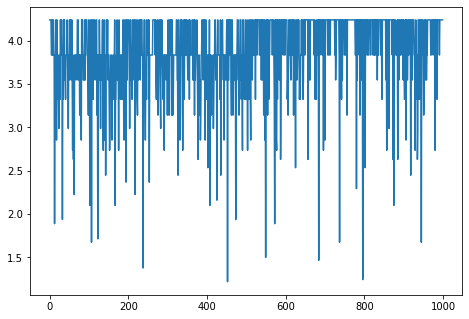

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
kata = l
Nilai = idf
ax.plot(Nilai)
plt.show()

## Topic Modelling LSA 

Latent semantic analysis (LSA) adalah teknik dalam pemrosesan bahasa alami , khususnya semantik distribusional , menganalisis hubungan antara satu set dokumen dan istilah yang dikandungnya dengan menghasilkan satu set konsep yang terkait dengan dokumen dan istilah. 
langkah-langkah LSA sebagai berikut:
1. Teks Preprocessing
2. Term-document Matrix
3. Singular Value Decomposition
Singular Value Decomposition (SVD) adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :
– Matriks ortogonal U
– Matriks diagonal S
– Transpose dari matriks ortogonal V
Yang dirumuskan dengan :

$A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}$

Keterangan:

$$\begin{array}{ll}\mathrm{A}_{\mathrm{mn}}= & \text { matriks awal } \\ \mathrm{U}_{\mathrm{mm}}= & \text { matriks ortogonal U } \\ \mathrm{S}_{\mathrm{mn}}= & \text { matriks diagonal } \mathrm{s} \\ \mathrm{V}_{n \pi}^{\top}= & \text { transpose matriks ortogonal } \mathrm{V}\end{array}$$

Hasil dari proses SVD adalah vektor yang akan digunakan untuk menghitung similaritasnya dengan pendekatan cosine similarity.


4.Cosine Similarity Measurement
Cosine similarity digunakan untuk menghitung nilai kosinus sudut antara vektor dokumen dengan vektor kueri. Semakin kecil sudut yang dihasilkan, maka tingkat kemiripan esai semakin tinggi.
Formula dari cosine similarity adalah sebagai berikut:

$\begin{equation}
\cos \alpha=\frac{\boldsymbol{A} \cdot \boldsymbol{B}}{|\boldsymbol{A}||\boldsymbol{B}|}=\frac{\sum_{i=1}^{n} \boldsymbol{A}_{i} X \boldsymbol{B}_{i}}{\sqrt{\sum_{i=1}^{n}\left(\boldsymbol{A}_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(\boldsymbol{B}_{i}\right)^{2}}}
\end{equation}$
 
Keterangan:

A $\quad=$ vektor dokumen

B $\quad=$ vektor kueri

A $\cdot \mathbf{B}=$ perkalian $\operatorname{dot}$ vektor $\mathrm{A}$ dan vektor $\mathrm{B}$

$|\mathrm{A}| \quad=$ panjang vektor $\mathrm{A}$

$\left.\right|^{\boldsymbol{B}} \mid \quad=$ panjang vektor $B$

$\mid \boldsymbol{A}_{|| \mathrm{B} \mid}=$ cross product antara $|\mathrm{A}|$ dan $|\mathrm{B}|$


Dari hasil cosine similarity, akan didapatkan nilai yang akan dibandingkan dengan penilaian manusia untuk diuji selisih nilainya.

In [16]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=50, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [17]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.06882448  0.27245523 -0.00387394 ...  0.14532464  0.00134145
   0.00661104]
 [ 0.56578288 -0.25181322 -0.24192285 ...  0.09406852  0.09104575
   0.02513334]
 [ 0.2734554  -0.13616611  0.72362478 ... -0.01284269 -0.31929787
   0.0739685 ]
 ...
 [ 0.54043373 -0.28470221 -0.18874866 ... -0.02306753  0.0146919
  -0.09316259]
 [ 0.15848935  0.10863096  0.06272179 ...  0.01203472  0.03770214
   0.01633764]
 [ 0.532259   -0.0269196  -0.14266228 ... -0.00155156 -0.00797086
   0.0377059 ]]
(50, 50)


In [18]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  6.882448356653467
Topic  1  :  27.24552321029806
Topic  2  :  -0.38739398904237504
Topic  3  :  24.38173039473795
Topic  4  :  1.8496010417855302
Topic  5  :  14.060404487449501
Topic  6  :  64.91171302028877
Topic  7  :  12.589149754545993
Topic  8  :  -12.156488745115082
Topic  9  :  -35.43167579935794
Topic  10  :  6.200957404255839
Topic  11  :  -2.721771808514066
Topic  12  :  -3.3518781141456317
Topic  13  :  -2.766649136370064
Topic  14  :  6.247612390914547
Topic  15  :  -1.4616632405353294
Topic  16  :  -0.8364506365120918
Topic  17  :  0.18099297588821578
Topic  18  :  0.6677569410536411
Topic  19  :  -2.9036953440621716
Topic  20  :  0.8525393554096086
Topic  21  :  4.31850613751586
Topic  22  :  -3.794730391180355
Topic  23  :  -2.641639696343228
Topic  24  :  -0.27325688435625023
Topic  25  :  -0.7573868440355351
Topic  26  :  2.178185992685262
Topic  27  :  2.5221304613252062
Topic  28  :  1.9349818406295256
Topic  29  :  -0.839378807724718
Topic

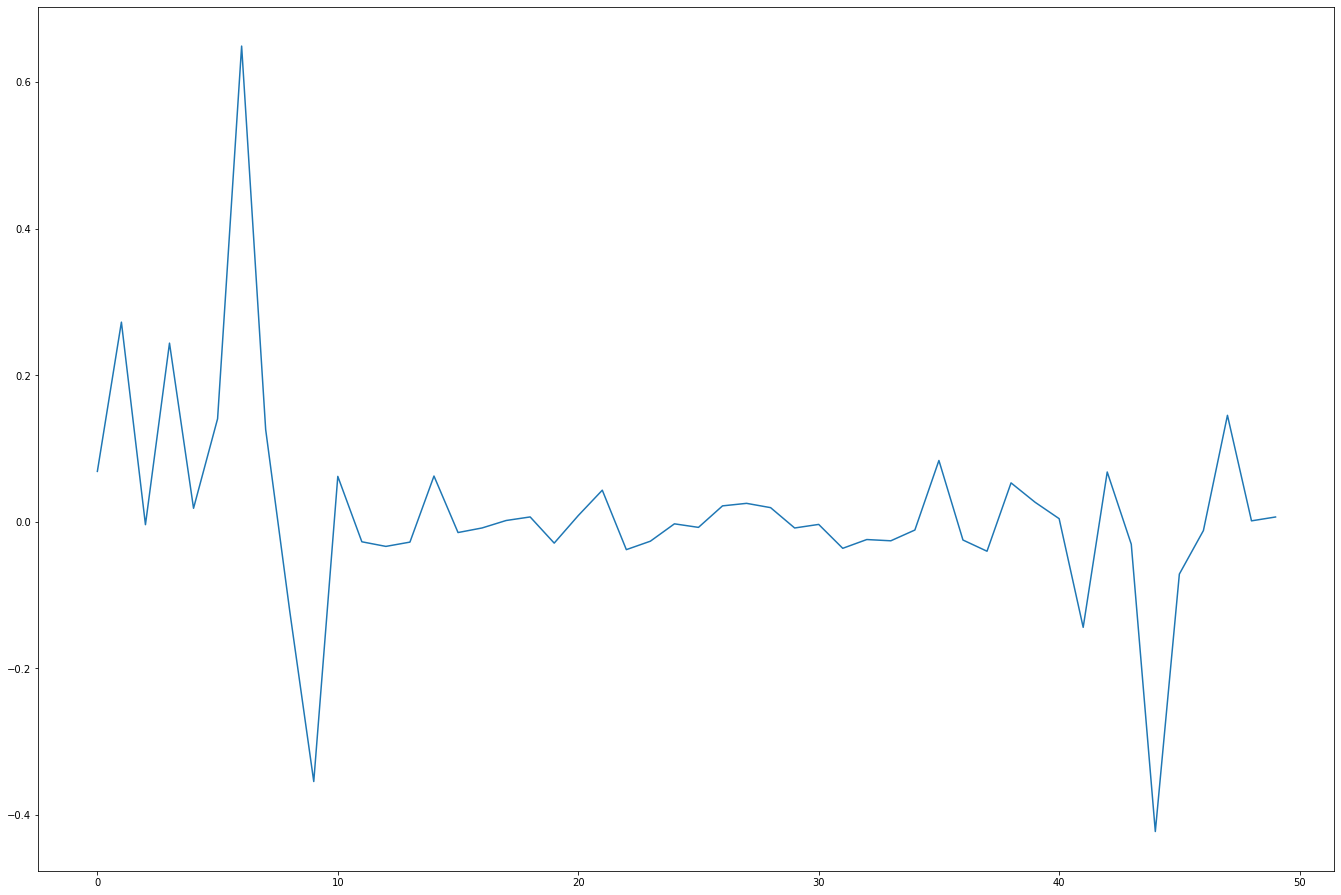

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
Nilai = topic
topic2 = l
ax.plot(topic2)
plt.show()

In [20]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(50, 1000)
[[ 0.02083154  0.00613697  0.01351605 ...  0.00548304  0.02083154
   0.03124731]
 [ 0.00027003  0.00933731 -0.00565027 ... -0.0051317   0.00027003
   0.00040504]
 [-0.00591647  0.00098918 -0.00082242 ...  0.03121209 -0.00591647
  -0.0088747 ]
 ...
 [ 0.02481044  0.00279789 -0.00438256 ... -0.00236904  0.02481044
   0.03721567]
 [ 0.00406422 -0.00223938  0.00771051 ... -0.07394541  0.00406422
   0.00609632]
 [-0.01521117 -0.00326002  0.03188588 ...  0.021489   -0.01521117
  -0.02281675]]


In [21]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: 
citra wajah pengenalan data proses sistem metode tulisan tangan penelitian 

Topic 1: 
pembelajaran bahasa madura game siswa aplikasi teknologi pendidikan guru kriteria 

Topic 2: 
sidik jari minutiae corepoint otomatis skenario nilai ridge geometry lakukan 

Topic 3: 
pembelajaran bahasa game wajah madura sidik jari aplikasi siswa citra 

Topic 4: 
tulisan tangan huruf telapak pengenalan karakter carakan pola arah orang 

Topic 5: 
dokumen plagiarisme nilai similarity fingerprint gram index latent semantik svd 

Topic 6: 
game madura sapi budaya bahasa karapan kerapan html kriteria tulisan 

Topic 7: 
peramalan straw mse produksi error kebutuhan square single mape komputer 

Topic 8: 
bahasa rule madura data support teknik pohon mahasiswa prediksi keputusan 

Topic 9: 
bahasa madura siswa peramalan tangan produksi tulisan single dasar obyek 

Topic 10: 
bangkalan jalan pertanian kondisi lahan tanaman bahasa madura arsitektur togaf 

Topic 11: 
suara karakter citra filter aku

### Daftar Pustaka
- Nawassyarif, Julkarnain M, K. R. A. (2020). 338108-sistem-informasi-pengolahan-data-ternak-30b9d1b3 ( Pengertian Sistem infomasi. Jurnal JINTEKS, 2(1), 32–39.
- Hanifah, R., & Nurhasanah, I. S. (2018). Implementasi Web Crawling Untuk Mengumpulkan Web Crawling Implementation for Collecting. Jurnal Teknologi Informasi Dan Ilmu Komputer (JTIIK), 5(5), 531–536. https://doi.org/10.25126/jtiik20185842
- https://docs.scrapy.org/en/latest/intro/tutorial.html
- Setyohadi, D. B., Kristiawan, F. A., & Ernawati, E. (2017). Perbaikan Performansi Klasifikasi Dengan Preprocessing Iterative Partitioning Filter Algorithm. Telematika, 14(01), 12–20. https://doi.org/10.31315/telematika.v14i01.1960
- Merinda Lestandy, Abdurrahim Abdurrahim, & Lailis Syafa’ah. (2021). Analisis Sentimen Tweet Vaksin COVID-19 Menggunakan Recurrent Neural Network dan Naïve Bayes. Jurnal RESTI (Rekayasa Sistem Dan Teknologi Informasi), 5(4), 802–808. https://doi.org/10.29207/resti.v5i4.3308
- Prihatini, P. M. (2016). Implementasi Ekstraksi Fitur Pada Pengolahan Dokumen Berbahasa Indonesia. Jurnal Matrix, 6(3), 174–178.
- https://socs.binus.ac.id/2015/08/03/penggunaan-latent-semantic-analysis-lsa-dalam-pemrosesan-teks/
- https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook